{'blockxsize': 192,
 'blockysize': 176,
 'compress': 'packbits',
 'count': 1,
 'crs': CRS({'init': 'epsg:32611'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 1684,
 'interleave': 'band',
 'nodata': None,
 'tiled': True,
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
       0.0, -29.999999999999723, 4229820.934460746),
 'width': 1777}
(1,)


Text(0,0.5,'Row #')

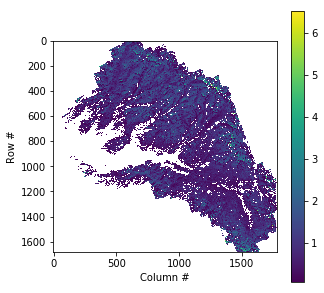

In [23]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pprint
import seaborn as sns

with rasterio.open('./data/TB20140323_SUPERsnow_depth.tif_mean30m.tif') as raster:
    pprint.pprint(raster.profile)
    print(raster.indexes)
    snowdepth_data = raster.read(1)

plt.figure(figsize=(5,5))
plt.imshow(snowdepth_data)
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

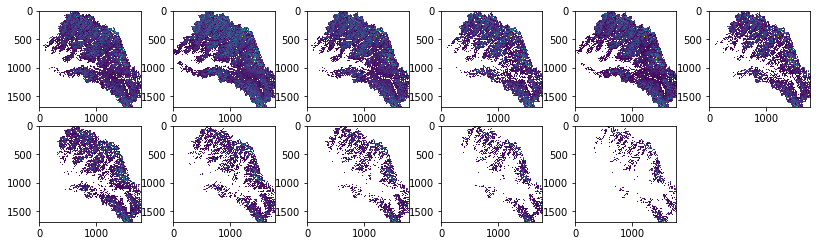

In [5]:
with rasterio.open('./data/scene_30m_mask.tif') as raster:
    mask = raster.read(1)

dates_in_2014 = ["0323", "0407", "0413", "0420", "0428", "0502", "0511", "0517", "0527", "0531", "0605"]
data_matrices = []

for date in dates_in_2014:
    with rasterio.open(f"./data/TB2014{date}_SUPERsnow_depth.tif_mean30m.tif") as raster:
        data_matrices.append(raster.read(1))

plt.figure(figsize=(14,6))
plot_number = 1
for matrix in data_matrices:
    ax = plt.subplot(3,6, plot_number)
    plt.imshow(matrix)
    plot_number = plot_number + 1
    
plt.tight_layout

{'blockxsize': 192,
 'blockysize': 176,
 'compress': 'packbits',
 'count': 1,
 'crs': CRS({'init': 'epsg:32611'}),
 'driver': 'GTiff',
 'dtype': 'float64',
 'height': 1684,
 'interleave': 'band',
 'nodata': None,
 'tiled': True,
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
       0.0, -29.999999999999723, 4229820.934460746),
 'width': 1777}
(1,)


Text(0,0.5,'y')

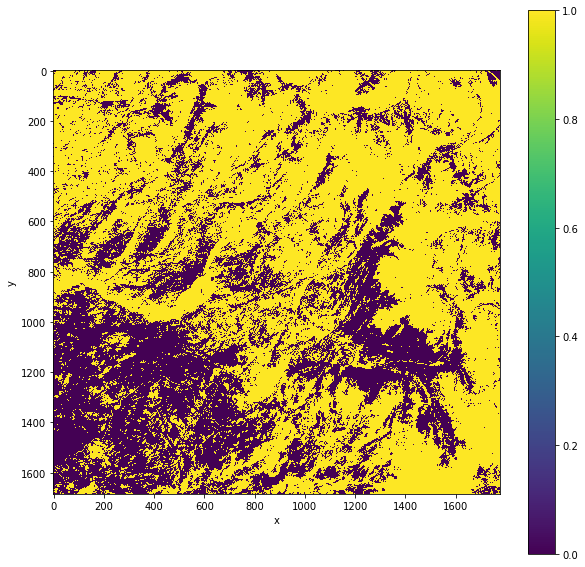

In [17]:
with rasterio.open('./data/veg_bin30res.tif') as veg:
    pprint.pprint(veg.profile)
    print(veg.indexes)
    snowdepth_data = veg.read(1)
    
plt.figure(figsize=(10,10))
plt.imshow(snowdepth_data)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

In [34]:
with rasterio.open('./data/scene_30m_mask.tif') as raster:
    mask = raster.read(1)
    pprint.pprint(mask)
dates_in_2014 = ["0323", "0407", "0413", "0420", "0428", "0502", "0511", "0517", "0527", "0531", "0605"]
data_matrices = []


for date in dates_in_2014:
    with rasterio.open(f"./data/TB2014{date}_SUPERsnow_depth.tif_mean30m.tif") as raster:
        data_matrices.append(raster.read(1)*mask)

data_matrices = np.nan_to_num(data_matrices)
diffs = np.diff(data_matrices, axis = 0)
diffs[abs(diffs) < 0.001] = np.nan

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

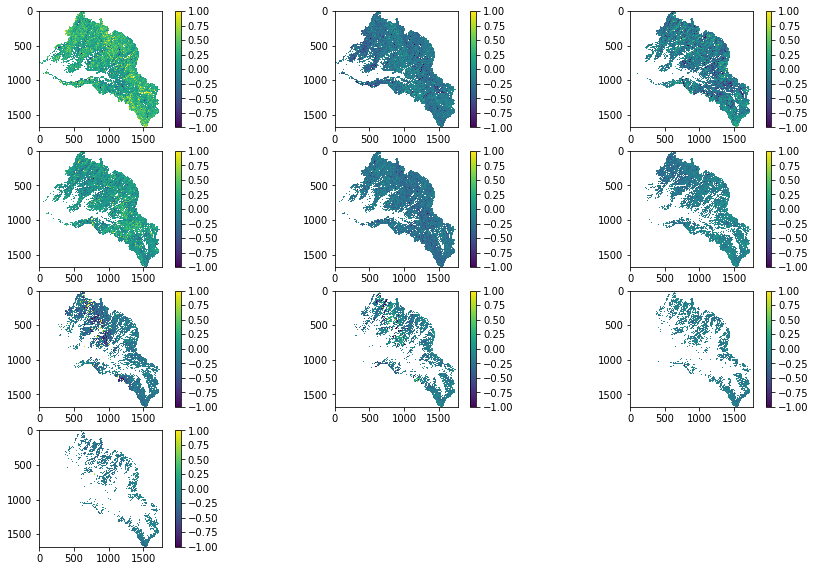

In [36]:
plt.figure(figsize=(15,15))
plot_number = 1
for matrix in diffs:
    ax = plt.subplot(6,3,plot_number)
    plt.imshow(matrix, vmin = -1, vmax = 1)
    plot_number = plot_number + 1
    plt.colorbar()
    
plt.tight_layout